### Adapter Design Pattern

Sometimes, classes have been written and you can't modify their interface to suit your needs if the method you are callng is on a different system across a network. <br><br>

The Adapter design pattern solves these problems:
- How can a class be reused that doesn't have an interface that a client requires?
- How can classes that have incompatible interfaces work together?
- How can an alternative interface be provided for a class?

You may have two classes that are similar, but they have different method signatures, so you create
an Adapter over top of one of the method signatures so that it is easier to implement and extend in
the client.<br><br>

The Adapter is used when you have an existing interface that doesn't directly map to an interface
that the client requires.

### Terminology
- Target: The domain specific interface or class that needs to be adapted.
- Adapter Interface: The interface of the target that the adapter will need to implement.
- Adapter: The concrete adapter class containing the adaption process.
- Client: The client application that will use the Adapter.


### The Adapter UML

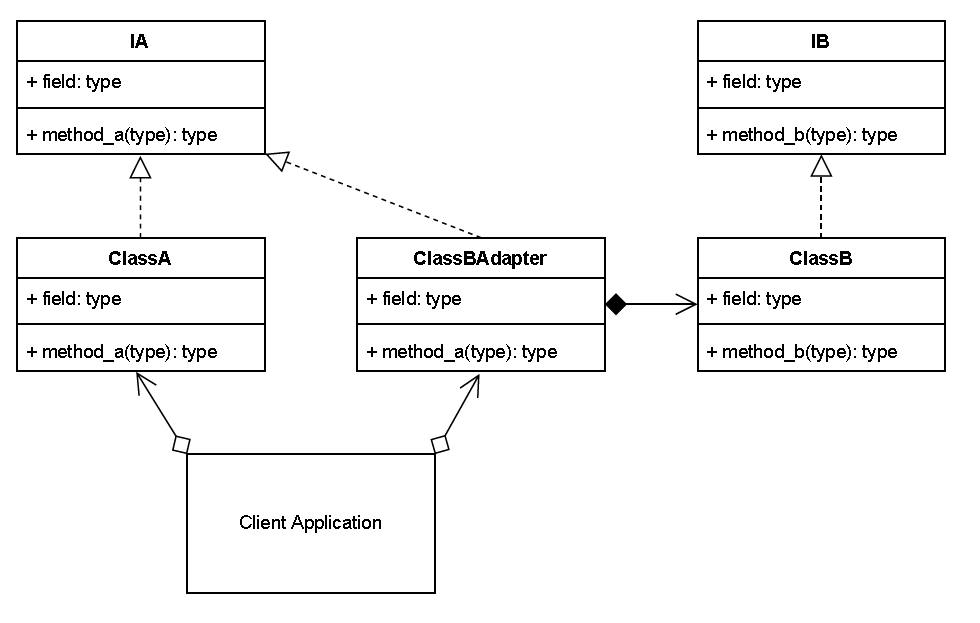

In [1]:
from PIL import Image
Image.open("../Adapter_UML.png")

### Source code
In this concept source code, there are two classes, ClassA and ClassB , with different method
signatures. Let's **consider that ClassA provides the most compatible and preferred interface for
the client.**<br><br>

Although you may be able to create objects of both classes in the client and it may work, it will require conditional check to see which type of class it is as method signatures are different.<br><br>

It means that the client is doing extra work. Instead, you can create Adapter interface for the incompatible ClassB that reduces the need for the extra conditional logic. 


In [8]:
from abc import ABC, abstractmethod

class IA(ABC):
    "An Interface for an object"
    @staticmethod
    @abstractmethod
    def method_a():
        "An abstract methodA"

class ClassA(IA):
    "A Sample Class that implements IA"
    def method_a(self):
        print("method A")
        

class IB(ABC):
    "An interface for an object"
    @staticmethod
    @abstractmethod
    def method_b():
        "An abstract method B"
        
class ClassB(IB):
    "A sample class that implements IB"
    def method_b(self):
        print("method B")

In [9]:
class ClassBAdapter(IA):
    "ClassB does not have a method_a so we can create an adapter"
    
    def __init__(self):
        self.class_b = ClassB()
    
    def method_a(self):
        "class the class b method_b instead"
        self.class_b.method_b()

In [10]:
# the client
# before the adapter you need to test the objects class to know which method to call.

ITEMS=[ClassA(),ClassB()]
for item in ITEMS:
    if isinstance(item,ClassB):
        item.method_b()
    else:
        item.method_a()

method A
method B


In [11]:
# After creating an adapter for ClassB I can reuse the same method
# signature as ClassA (preferred)
ITEMS = [ClassA(), ClassBAdapter()]
for item in ITEMS:
    item.method_a()

method A
method B


### Adapter Use Case

The example client can manufacture a ***Cube*** using different tools. Each solution is invented by a different company. The client user interface manages the Cube product by indicating ***width, height, depth***. This is compatible with the company A that produces the Cube tool, but not the company B that produces their own version. <br><br>

In this example, the client will re-use the interface for company A's Cube and create a compatible Cube from company B. 


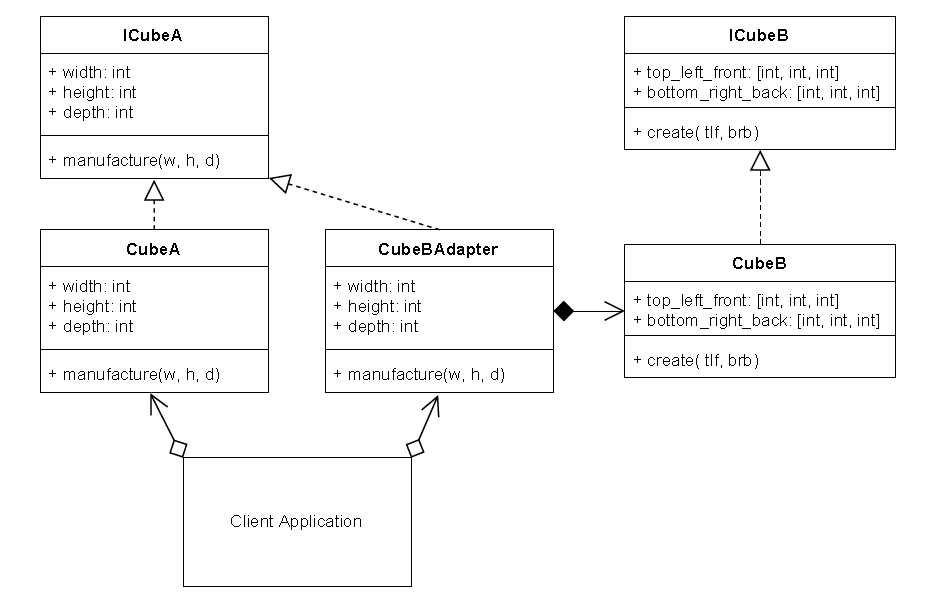

In [12]:
Image.open("../Adapter_UML_usecase.png")

In [13]:
#./adapter/interface_cube_a_b.py
from abc import ABC,abstractmethod
class ICubeA(ABC):
    "An interface for an object"
    @staticmethod
    @abstractmethod
    def manufacture(width, height, depth):
        "manufactures a cube"
        
class ICubeB(ABC):
    "An interface for an object"
    @staticmethod
    @abstractmethod
    def create(top_left_front, bottom_right_back):
        "Manufactures a Cube with coords offset [0, 0, 0]"

In [16]:
#./adapter/cube_a.py
import time
#from interface_cube_a_b import ICubeA

class CubeA(ICubeA):
    "A hypothetical Cube tool from company A"
    
    # a static variable indicating the last time a cube was manufactured
    last_time = int(time.time())
    
    def __init__(self):
        self.width = self.height = self.depth = 0
    
    def manufacture(self,width,height,depth):
        self.width = width
        self.height = height
        self.depth = depth
        
        #if not busy, then manufacture a cube with dimentions
        now = int(time.time())
        if now > int(CubeA.last_time +1 ):
            CubeA.last_time= now
            return True
        return False #busy


In [18]:
#./adapter/cube_b.py
import time
#from interface_cube_b import ICubeB

class CubeB(ICubeB):
    "A hypothetical Cube tool from company B"
    
    last_time = int(time.time())
    
    def create(self,top_left_front, bottom_right_back):
        now = int(time.time())
        if now > int(CubeB.last_time +2):
            CubeB.last_time = now
            return True
        return False
    

In [19]:
#./adapter/cube_b_adapter.py
#from interface_cube_a_b import ICubeA
#from cube_b import CubeB

class CubeBAdapter(ICubeA):
    "Adapter for CubeB that implements ICubeA"
    
    def __init__(self):
        self.cube = CubeB()
        self.width = self.height =self.depth =0
        
    def manufacture(self,width,height,depth):
        self.width =width
        self.height = height
        self.depth = depth
        
        success= self.cube.create(
            [0-width/2, 0-height/2, 0-depth/2], #????
            [0+width/2, 0+height/2, 0+depth/2]
        )
        return success

In [20]:
#./adapter/client.py

import time, random

TOTALCUBES=5
COUNTER=0

while COUNTER<TOTALCUBES:
    #Produce 5 cubes from which ever supplier can manufacture it first
    WIDTH = random.randint(1,10)
    HEIGHT = random.randint(1,10)
    DEPTH = random.randint(1,10)
    CUBE=CubeA()
    SUCCESS= CUBE.manufacture(WIDTH,HEIGHT,DEPTH)
    if SUCCESS:
        print(
            f"Company A building Cube id:{id(CUBE)}, "
            f"{CUBE.width}x{CUBE.height}x{CUBE.depth}" 
            )
        COUNTER=COUNTER+1
    else: #try other manufacturer
        print("Company A is busy, trying company B")
        CUBE = CubeBAdapter()
        SUCCESS =CUBE.manufacture(WIDTH,HEIGHT,DEPTH)
        if SUCCESS:
            print(
                f"Company B building Cube id:{id(CUBE)}, "
                f"{CUBE.width}x{CUBE.height}x{CUBE.depth}"                
            )
            COUNTER = COUNTER+1
        else:
            print("Company B is busy, trying company A")
    #wait some time before manufactuing a new cube
    time.sleep(1)
print(f"{TOTALCUBES} cubes have been manufactured")
        

Company A building Cube id:3095948877232, 7x2x7
Company A is busy, trying company B
Company B building Cube id:3095948433568, 9x5x2
Company A building Cube id:3095948877232, 7x3x3
Company A is busy, trying company B
Company B is busy, trying company A
Company A building Cube id:3095948436352, 8x6x8
Company A is busy, trying company B
Company B building Cube id:3095948441872, 1x9x2
5 cubes have been manufactured
